In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df.drop(['last_evaluation', 'number_project', 'Department', 'time_spend_company'], axis=1, inplace=True)

In [3]:
left = df[df.left==1]

In [4]:
retained = df[df.left==0]

In [5]:
df.groupby('left').mean()
df.head(3)

,satisfaction_level,average_montly_hours,Work_accident,left,promotion_last_5years,salary
0,0.38,157,0,1,0,low
1,0.80,262,0,1,0,medium
2,0.11,272,0,1,0,medium


From above table we can infer that employyes with low satisfaction level tends to leave the company.

<AxesSubplot:xlabel='salary'>

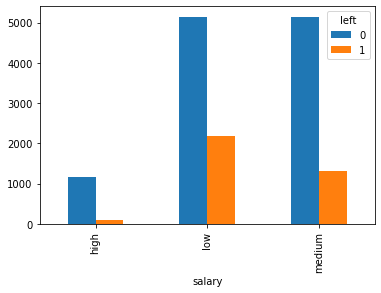

In [6]:
pd.crosstab(df.salary, df.left).plot(kind='bar')

This bar chart shows employees with high salary are likely to not leave the company

<AxesSubplot:xlabel='promotion_last_5years'>

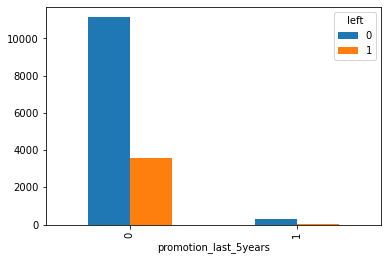

In [7]:
pd.crosstab(df.promotion_last_5years, df.left).plot(kind='bar')

this bar chart infers that employees with no promotions tends to leave the company

In [8]:
salary_dummies = pd.get_dummies(df.salary, prefix='salary')

In [9]:
new_df = pd.concat([df, salary_dummies], axis=1)

In [10]:
new_df.drop(['salary','salary_medium'],axis=1, inplace=True)

In [11]:
X = new_df.drop(['left'], axis=1)
y = new_df['left']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
predictions = model.predict(X_test)

In [15]:
score = accuracy_score(y_test, predictions)

In [16]:
'The score of the model is: ' + str(score)

'The score of the model is: 0.7873333333333333'